In [67]:
import os
import shutil
from tensorflow import keras
from tensorflow.keras import layers


In [68]:
data_from_kaggle = "data_from_kaggle/train"

data_dirname = "dogs_vs_cats"

In [69]:
def make_dataset(subset_name, start_idx, end_idx):
    for category in { "cat", "dog" }:
       dir = f"{data_dirname}/{subset_name}/{category}"
       os.makedirs(dir)
       fnames = [f"{category}.{i}.jpg" for i in range(start_idx, end_idx)]
       for fname in fnames: 
             shutil.copyfile(src=f"{data_from_kaggle}/{fname}", dst=f"{dir}/{fname}") 

In [70]:
make_dataset("train", 0, 1000)
make_dataset("validation", 1001, 1500)
make_dataset("test", 1501, 2500)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'dogs_vs_cats/train/cat'

In [71]:
import os
import shutil
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import image_dataset_from_directory
from dogs_cats import DogsCats
from dogs_cats_aug import DogsCatsAug

In [72]:
def build_model():
    input = keras.Input(shape=(200, 180, 3))
    x = layers.Rescaling(1./255)(input)
    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)

    model = keras.Model(inputs=input, outputs=outputs)
    return model

In [73]:
model = build_model()

In [74]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 200, 180, 3)]     0         
                                                                 
 rescaling_5 (Rescaling)     (None, 200, 180, 3)       0         
                                                                 
 conv2d_43 (Conv2D)          (None, 198, 178, 32)      896       
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 99, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 97, 87, 64)        18496     
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 48, 43, 64)        0         
 ng2D)                                                     

In [75]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [76]:
from tensorflow.keras.utils import image_dataset_from_directory
batch_size = 32

In [77]:
train_dataset = image_dataset_from_directory(f"{data_dirname}/train", image_size=(200, 180), batch_size=batch_size)
validation_dataset = image_dataset_from_directory(f"{data_dirname}/validation", image_size=(200, 180), batch_size=batch_size)
test_dataset = image_dataset_from_directory(f"{data_dirname}/test", image_size=(200, 180), batch_size=batch_size)

Found 2000 files belonging to 2 classes.
Found 998 files belonging to 2 classes.
Found 1998 files belonging to 2 classes.


In [78]:
callbacks = [ keras.callbacks.ModelCheckpoint(
    filepath="jaerock-in-class-from-scrach",
    save_best_only=False,
    monitor="val_loss"
)]

In [79]:
data_augmentation = keras.Sequential( [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
])

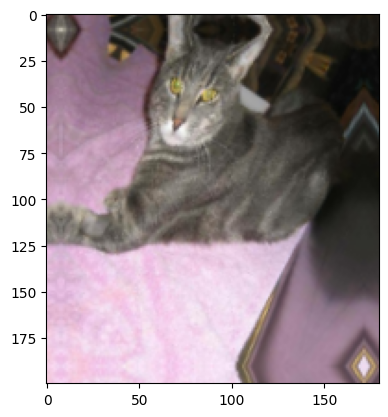

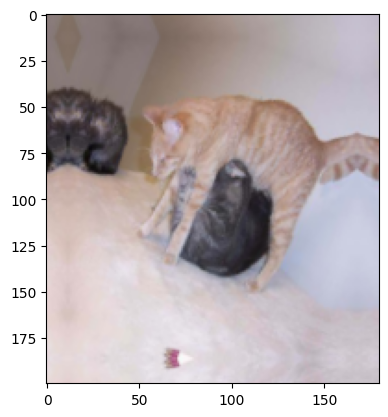

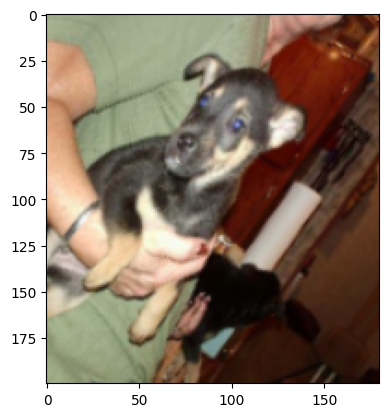

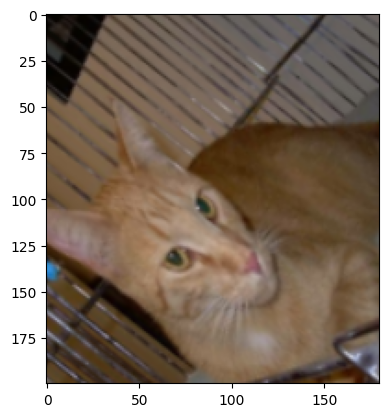

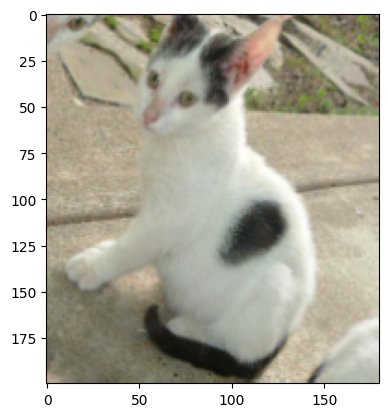

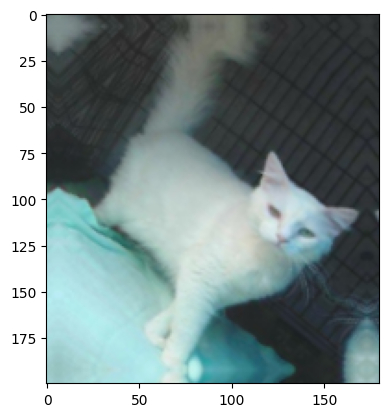

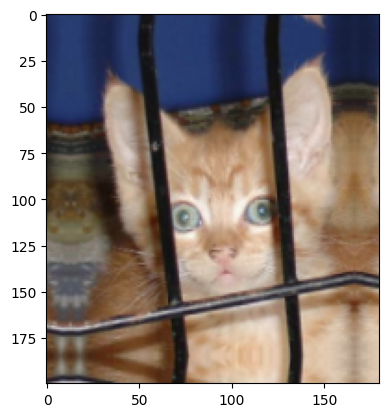

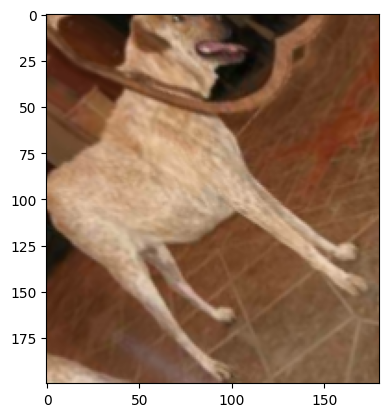

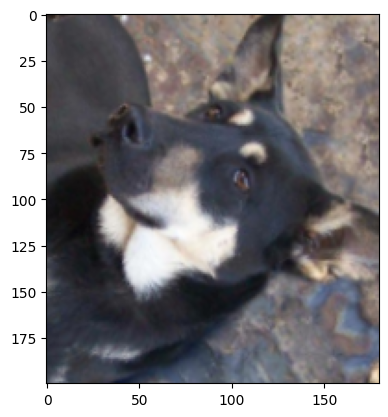

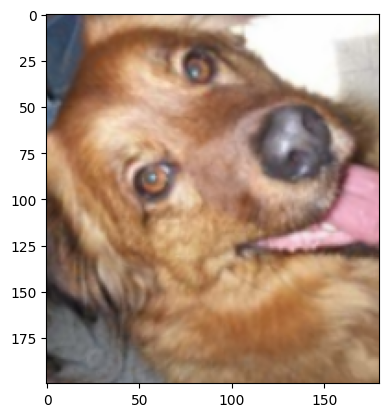

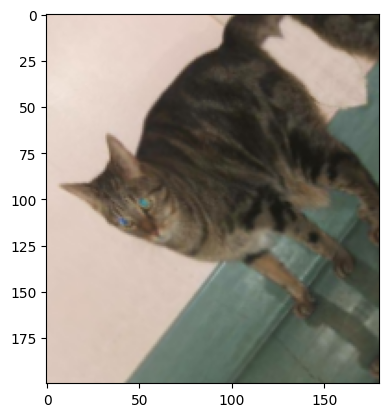

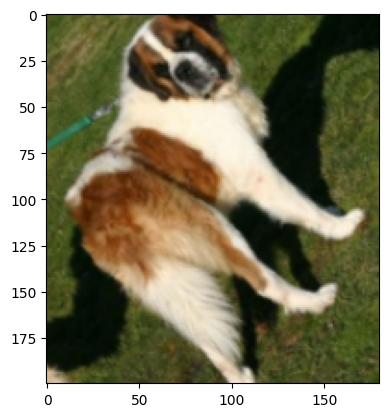

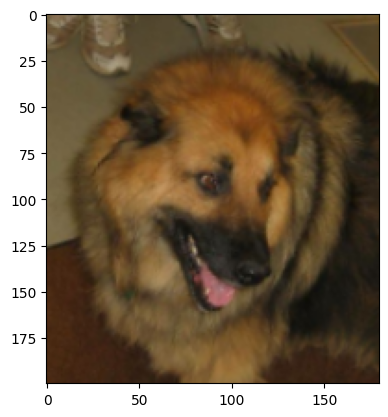

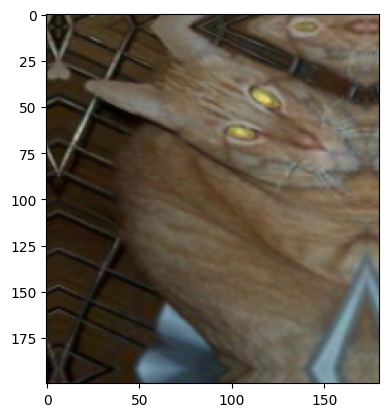

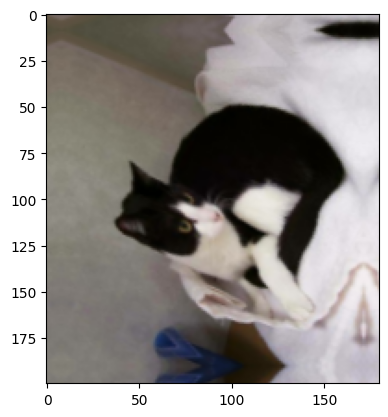

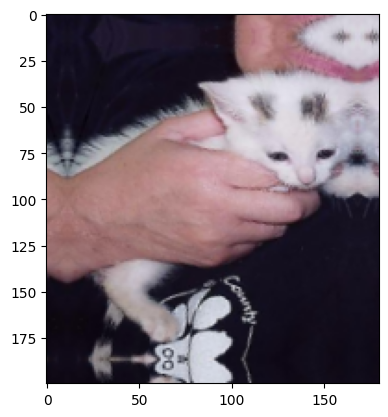

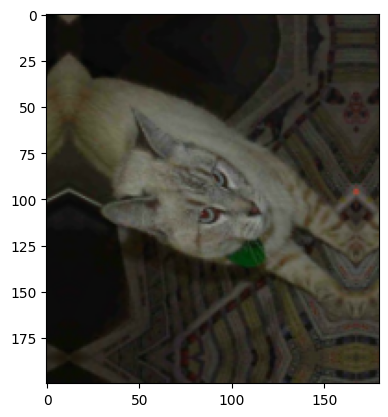

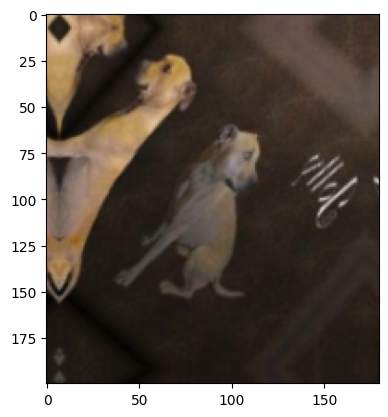

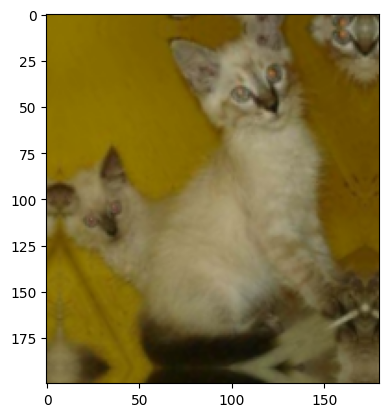

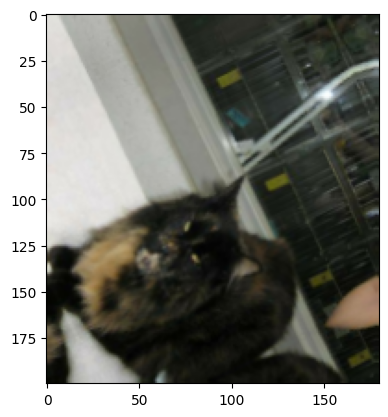

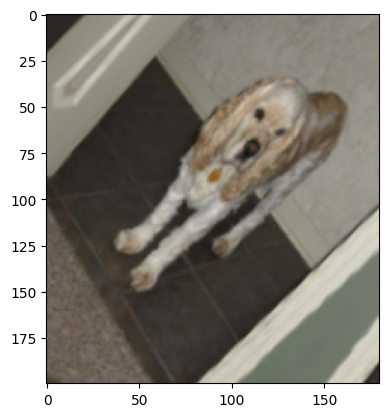

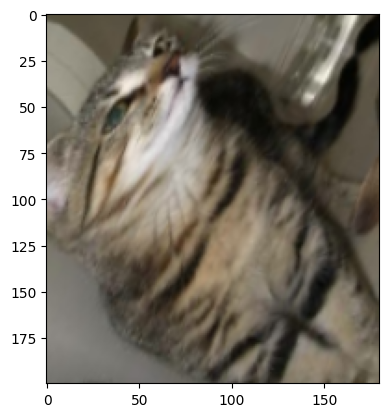

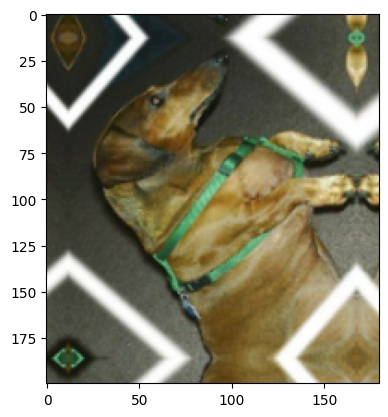

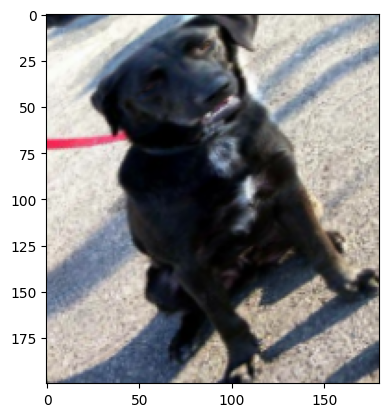

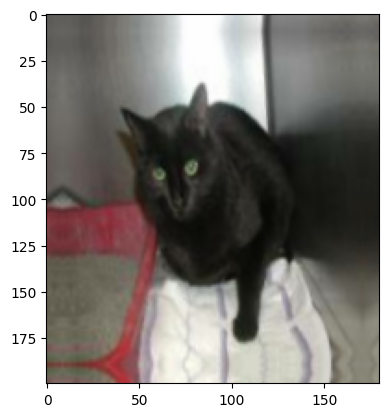

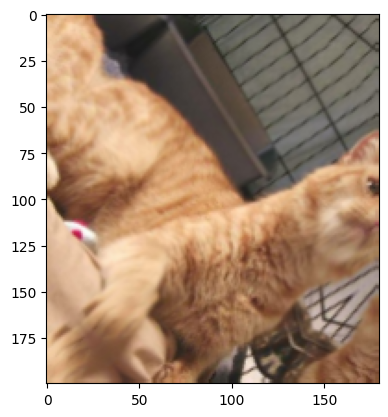

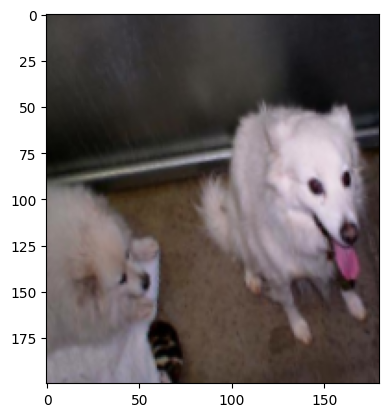

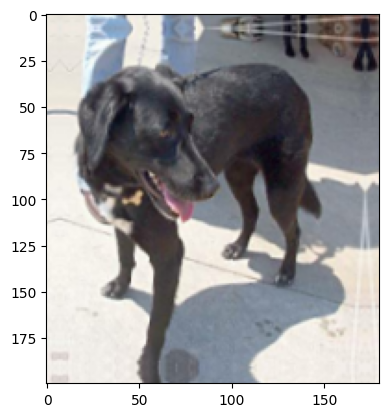

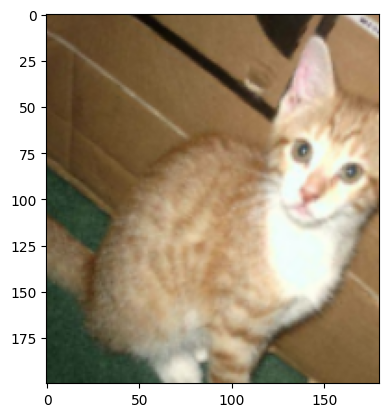

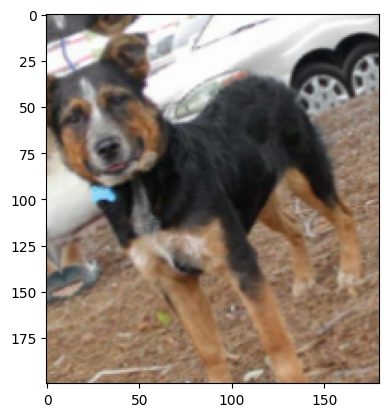

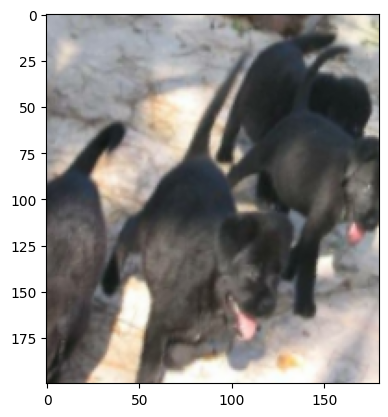

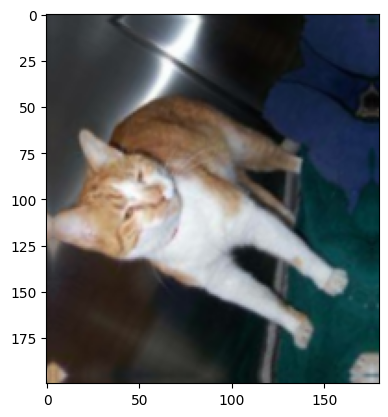

In [80]:
import matplotlib.pyplot as plt

for images, _ in train_dataset.take(1):
    for i in range(batch_size):
        aug_images = data_augmentation(images)

        plt.imshow(aug_images[i].numpy().astype("uint8"))
        plt.show()

In [81]:
#Training Dogs model
dog_cat_classifier = DogsCats()
model = dog_cat_classifier.build_model()
compiled_model = dog_cat_classifier.compile(model)
train_dataset, validation_dataset, test_dataset = dog_cat_classifier.prepare_datasets()
history = dog_cat_classifier.train(compiled_model, 'dog_cat_model', train_dataset, validation_dataset)

Found 2000 files belonging to 2 classes.
Found 998 files belonging to 2 classes.
Found 1998 files belonging to 2 classes.
Epoch 1/5
100/100 [==============================] - ETA: 0s - loss: 3.9615 - accuracy: 0.4980INFO:tensorflow:Assets written to: dog_cat_model\assets


INFO:tensorflow:Assets written to: dog_cat_model\assets


100/100 [==============================] - 52s 509ms/step - loss: 3.9615 - accuracy: 0.4980 - val_loss: 0.6851 - val_accuracy: 0.5291
Epoch 2/5
100/100 [==============================] - 48s 483ms/step - loss: 0.6900 - accuracy: 0.4990 - val_loss: 0.6922 - val_accuracy: 0.5070
Epoch 3/5
100/100 [==============================] - 49s 493ms/step - loss: 0.6913 - accuracy: 0.5240 - val_loss: 0.6902 - val_accuracy: 0.5170
Epoch 4/5
100/100 [==============================] - 49s 489ms/step - loss: 0.6960 - accuracy: 0.5355 - val_loss: 0.6919 - val_accuracy: 0.5120
Epoch 5/5
100/100 [==============================] - 49s 490ms/step - loss: 0.6865 - accuracy: 0.5345 - val_loss: 0.6993 - val_accuracy: 0.5240


In [82]:
# Evaluating on test set and printing accuracy
test_loss, test_accuracy = compiled_model.evaluate(test_dataset)
print("Test accuracy is".format(test_accuracy))
# Predicting 10 sample images
for i in range(1501,1521,2):
    image_path = f'dogs_vs_cats\\test\\dog\\dog.{i}.jpg'
    prediction = dog_cat_classifier.predict('dog_cat_model', image_path)
    print("Prediction of image {} with accuracy {}".format (image_path,prediction))

100/100 [==============================] - 11s 106ms/step - loss: 0.6975 - accuracy: 0.5330
Test accuracy is
1/1 [==============================] - 0s 62ms/step
Prediction of image dogs_vs_cats\test\dog\dog.1501.jpg with accuracy 0.5077969431877136
1/1 [==============================] - 0s 59ms/step
Prediction of image dogs_vs_cats\test\dog\dog.1503.jpg with accuracy 0.5007869601249695
1/1 [==============================] - 0s 63ms/step
Prediction of image dogs_vs_cats\test\dog\dog.1505.jpg with accuracy 0.48838695883750916
1/1 [==============================] - 0s 60ms/step
Prediction of image dogs_vs_cats\test\dog\dog.1507.jpg with accuracy 0.5079679489135742
1/1 [==============================] - 0s 61ms/step
Prediction of image dogs_vs_cats\test\dog\dog.1509.jpg with accuracy 0.4902074933052063
1/1 [==============================] - 0s 59ms/step
Prediction of image dogs_vs_cats\test\dog\dog.1511.jpg with accuracy 0.499856173992157
1/1 [==============================] - 0s 66ms/step

In [83]:
#Training the Cats Model
dog_cat_aug_classifier = DogsCatsAug()
aug_model = dog_cat_aug_classifier.build_model()
compiled_aug_model = dog_cat_aug_classifier.compile(aug_model)
aug_history = dog_cat_aug_classifier.train(compiled_aug_model, 'dog_cat_aug_model', train_dataset, validation_dataset)

Epoch 1/5
100/100 [==============================] - ETA: 0s - loss: 0.7061 - accuracy: 0.5000INFO:tensorflow:Assets written to: dog_cat_aug_model\assets


INFO:tensorflow:Assets written to: dog_cat_aug_model\assets


100/100 [==============================] - 50s 492ms/step - loss: 0.7061 - accuracy: 0.5000 - val_loss: 0.6924 - val_accuracy: 0.4950
Epoch 2/5
100/100 [==============================] - ETA: 0s - loss: 0.6947 - accuracy: 0.5210INFO:tensorflow:Assets written to: dog_cat_aug_model\assets


INFO:tensorflow:Assets written to: dog_cat_aug_model\assets


100/100 [==============================] - 51s 508ms/step - loss: 0.6947 - accuracy: 0.5210 - val_loss: 0.6915 - val_accuracy: 0.5050
Epoch 3/5
100/100 [==============================] - 48s 478ms/step - loss: 0.6922 - accuracy: 0.5230 - val_loss: 0.6939 - val_accuracy: 0.5010
Epoch 4/5
100/100 [==============================] - 50s 495ms/step - loss: 0.6938 - accuracy: 0.5190 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
100/100 [==============================] - 51s 509ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6915 - val_accuracy: 0.5531


In [84]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="tensorflow")
# Evaluating on test set and printing accuracy
aug_test_loss, aug_test_accuracy = compiled_aug_model.evaluate(test_dataset)
print("Test accuracy with augmentation is".format(aug_test_accuracy))
# Predicting 10 sample images
for i in range(1501,1521,2):
    image_path = f'dogs_vs_cats\\test\\cat\\cat.{i}.jpg'
    aug_prediction = dog_cat_aug_classifier.predict('dog_cat_aug_model', image_path)
    print("Prediction of image {} with accuracy {}".format (image_path,prediction))


100/100 [==============================] - 8s 83ms/step - loss: 0.6917 - accuracy: 0.5596
Test accuracy with augmentation is
1/1 [==============================] - 0s 66ms/step
Prediction of image dogs_vs_cats\test\cat\cat.1501.jpg with accuracy 0.49601978063583374
1/1 [==============================] - 0s 61ms/step
Prediction of image dogs_vs_cats\test\cat\cat.1503.jpg with accuracy 0.49601978063583374
1/1 [==============================] - 0s 66ms/step
Prediction of image dogs_vs_cats\test\cat\cat.1505.jpg with accuracy 0.49601978063583374
1/1 [==============================] - 0s 86ms/step
Prediction of image dogs_vs_cats\test\cat\cat.1507.jpg with accuracy 0.49601978063583374
1/1 [==============================] - 0s 69ms/step
Prediction of image dogs_vs_cats\test\cat\cat.1509.jpg with accuracy 0.49601978063583374
1/1 [==============================] - 0s 63ms/step
Prediction of image dogs_vs_cats\test\cat\cat.1511.jpg with accuracy 0.49601978063583374
1/1 [========================